# Exploratory Analysis

## 2023 Developer Survey conducted by Stack Overflow

In May 2023 over 90,000 developers responded to the annual survey about how they learn and level up, which tools they're using, and which ones they want. Here we explore developer profile and programming, scripting, and markup languages developers used in 2023. The goal is to figure out high-paying professionals and their programming preferences.

## Data Dictionary

`MainBranch` - Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".

`Age` - What is your age?

`Employment` - Which of the following best describes your current employment status? Select all that apply.

`RemoteWork` - Which best describes your current work situation?

`EdLevel` - Which of the following best describes the highest level of formal education that you’ve completed?

`YearsCode` - Including any education, how many years have you been coding in total?

`YearsCodePro` - NOT including education, how many years have you coded professionally (as a part of your work)?

`DevType` - Which of the following describes your current job, the one you do most of the time? Please select only one.

`Country` - Where do you live?

`ConvertedCompYearly` -  What is your current total annual compensation (salary, bonuses, and perks, before
taxes and deductions)? We converted salaries from user currencies to USD using the exchange rate on June 2, 2023.

`LanguageHaveWorkedWith` - Which programming, scripting, and markup languages have you done extensive development work in over the past year?

`ICorPM` - Are you an individual contributor or people manager?

`WorkExp` - How many years of working experience do you have?

`Industry` - What industry is the company you work for in?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sys
sys.path.append("../src")

from config import url2023, url2024, file_name
from data.load_data import get_data
from data.clean_data import dataset_cleaned

# load row data
df = get_data(url2023, file_name)

# cleaned subset of the data
cdf = dataset_cleaned(df)

In [2]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47975 entries, 0 to 47974
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              47975 non-null  object 
 1   Age                     47824 non-null  object 
 2   Employment              44102 non-null  object 
 3   RemoteWork              47929 non-null  object 
 4   EdLevel                 47975 non-null  object 
 5   YearsCode               47824 non-null  float64
 6   YearsCodePro            47267 non-null  float64
 7   LanguageHaveWorkedWith  47839 non-null  object 
 8   DevType                 47893 non-null  object 
 9   Country                 47975 non-null  object 
 10  ConvertedCompYearly     47975 non-null  float64
 11  ICorPM                  32628 non-null  object 
 12  WorkExp                 32529 non-null  float64
 13  Industry                27741 non-null  object 
dtypes: float64(4), object(10)
memory usage

## Pairwise relationships between numerical variables 

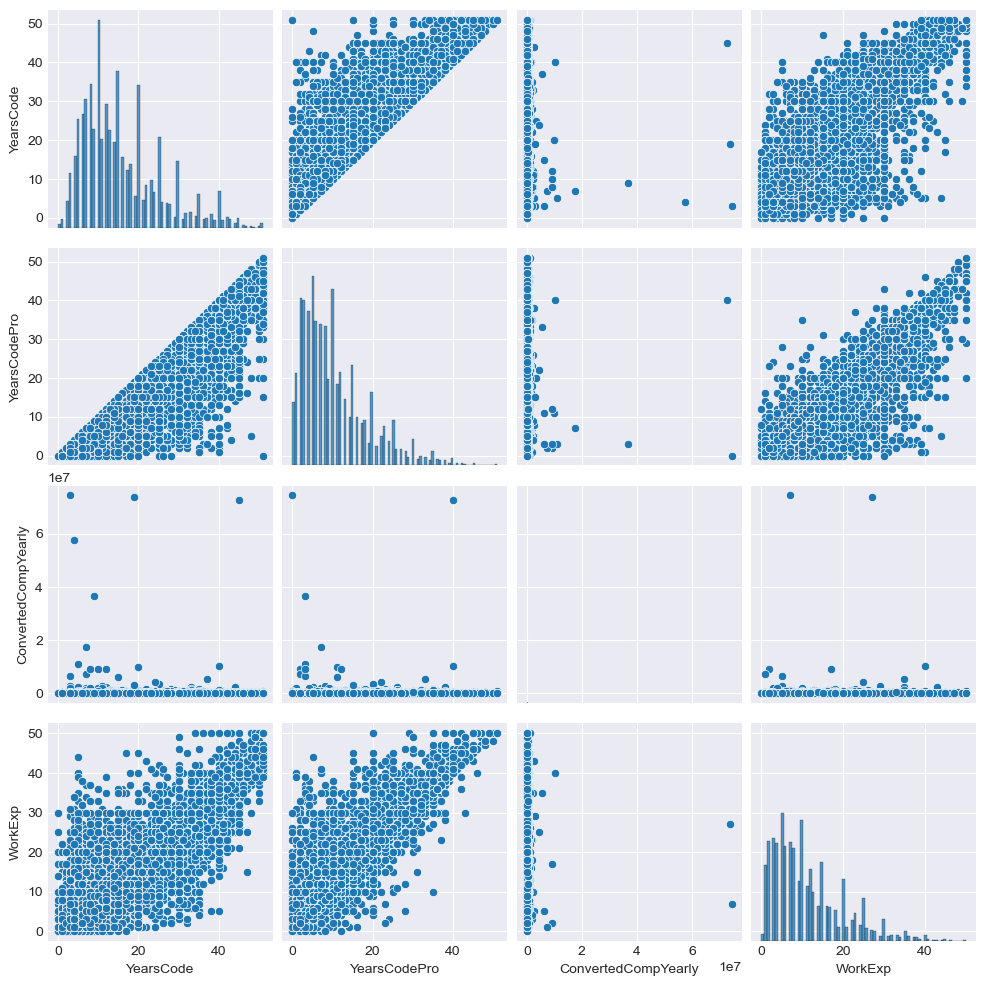

In [3]:
plt.style.use("seaborn-darkgrid")
sns.pairplot(cdf);

In [4]:
# Co-linearity
cdf.corr()

,YearsCode,YearsCodePro,ConvertedCompYearly,WorkExp
YearsCode,1.000000,0.917811,0.035634,0.867433
YearsCodePro,0.917811,1.000000,0.049573,0.930415
ConvertedCompYearly,0.035634,0.049573,1.000000,0.047618
WorkExp,0.867433,0.930415,0.047618,1.000000


## Remove outliers


In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()
rscaler = RobustScaler()

# calculate Z-score for annual salary
Zscore = pd.Series(scaler.fit_transform(cdf[["ConvertedCompYearly"]]).reshape(-1), index=cdf.index )

# calculate Z-score for annual salary using robust percentile measures
Zrscore = pd.Series(rscaler.fit_transform(cdf[["ConvertedCompYearly"]]).reshape(-1), index=cdf.index )

# define outliers based on Zscore
#fltr_outliers = Zscore.apply(lambda x: (x > 3) or (x < -3))

# define outliers based on Zscore robust
fltr_outliers = Zrscore.apply(lambda x: (x > 2) or (x < -2))

In [6]:
# number of outliers
fltr_outliers.sum()

2293

In [7]:
# remove outliers from dataset
cdf = cdf.loc[~fltr_outliers]

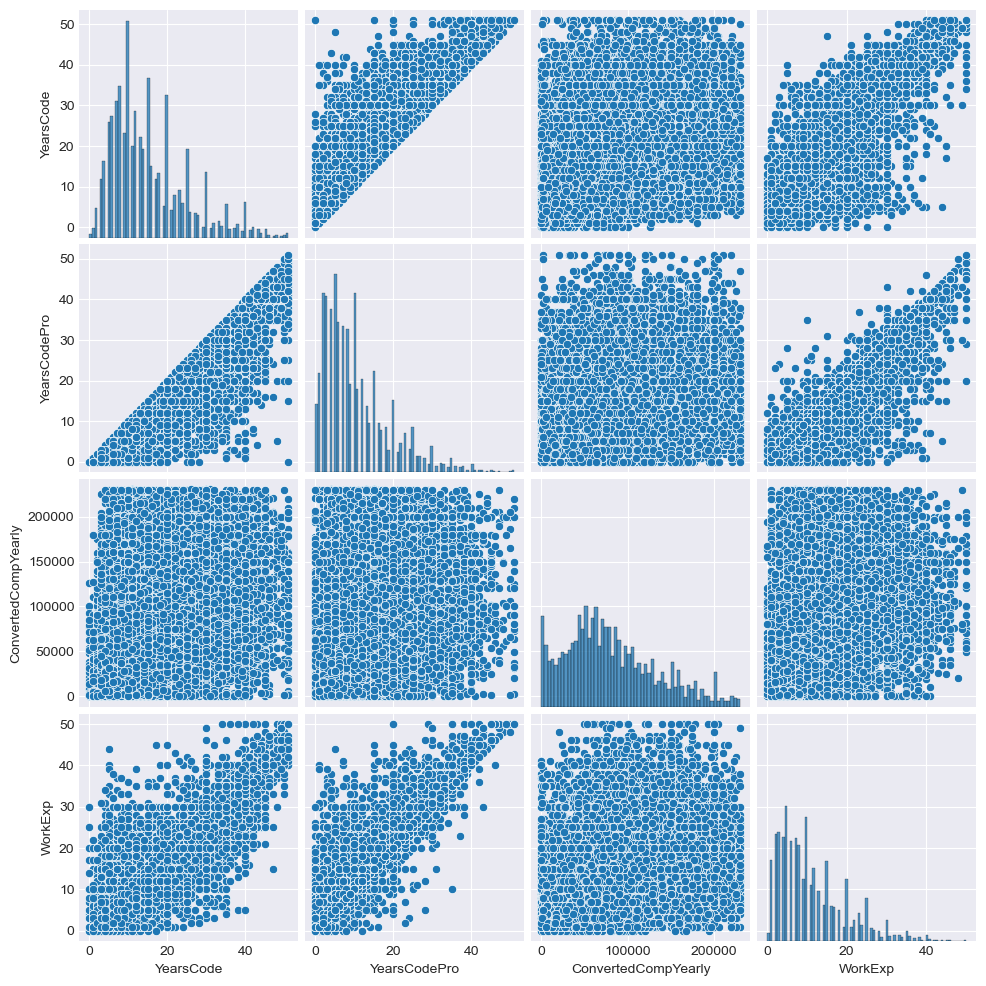

In [8]:
sns.pairplot(cdf);

In [9]:
# Co-linearity
cdf.corr()

,YearsCode,YearsCodePro,ConvertedCompYearly,WorkExp
YearsCode,1.000000,0.917339,0.329641,0.865178
YearsCodePro,0.917339,1.000000,0.336276,0.929269
ConvertedCompYearly,0.329641,0.336276,1.000000,0.348189
WorkExp,0.865178,0.929269,0.348189,1.000000


## Most Popular Programming Languages

In [10]:
# add a new feature
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf["NLanguageHaveWorkedWith"] = cdf.LanguageHaveWorkedWith.str.split(";").apply(lambda x: len(x) if x==x else np.nan)

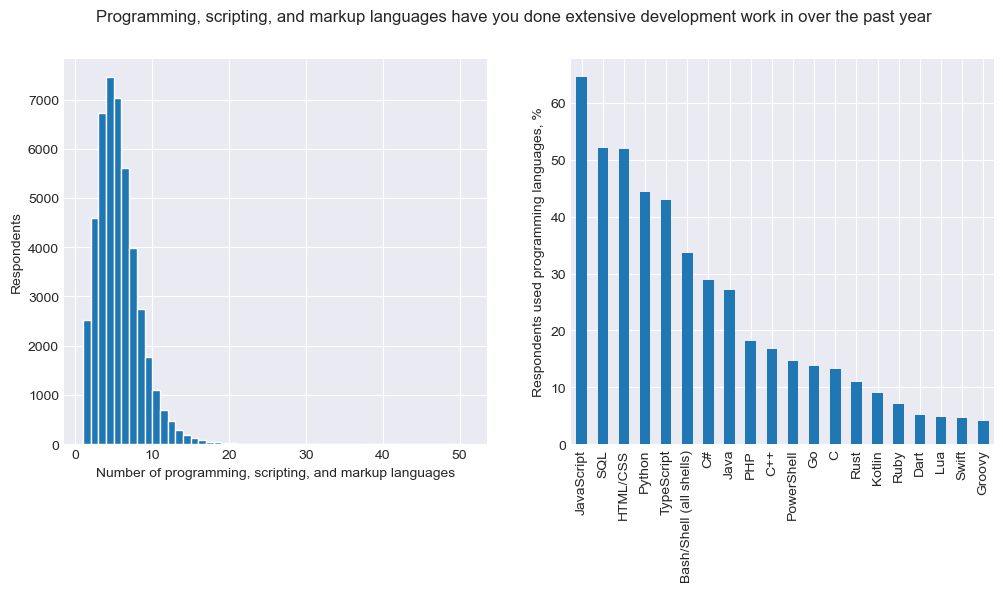

In [11]:
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

width = 12
height = 5 

fig = plt.figure(figsize=(width, height))
fig.tight_layout()
fig.suptitle("Programming, scripting, and markup languages have you done extensive development work in over the past year")

ax1 = fig.add_subplot(121)

cdf.NLanguageHaveWorkedWith.plot.hist(bins=50, edgecolor='w', ax=ax1)
plt.xlabel("Number of programming, scripting, and markup languages")
plt.ylabel("Respondents")

ax2 = fig.add_subplot(122)

(cdf.LanguageHaveWorkedWith.str.get_dummies(';').mean(axis=0)*100).sort_values(ascending=False)[:20].plot.bar(ax=ax2)
plt.ylabel("Respondents used programming languages, %")

plt.show()
plt.close()

In [12]:
# drop records where NLanguageHaveWorkedWith > 10

#cdf.drop(index=cdf[cdf.NLanguageHaveWorkedWith>10].index, inplace=True)
#cdf.reset_index(drop=True, inplace=True)

## Respondents by country

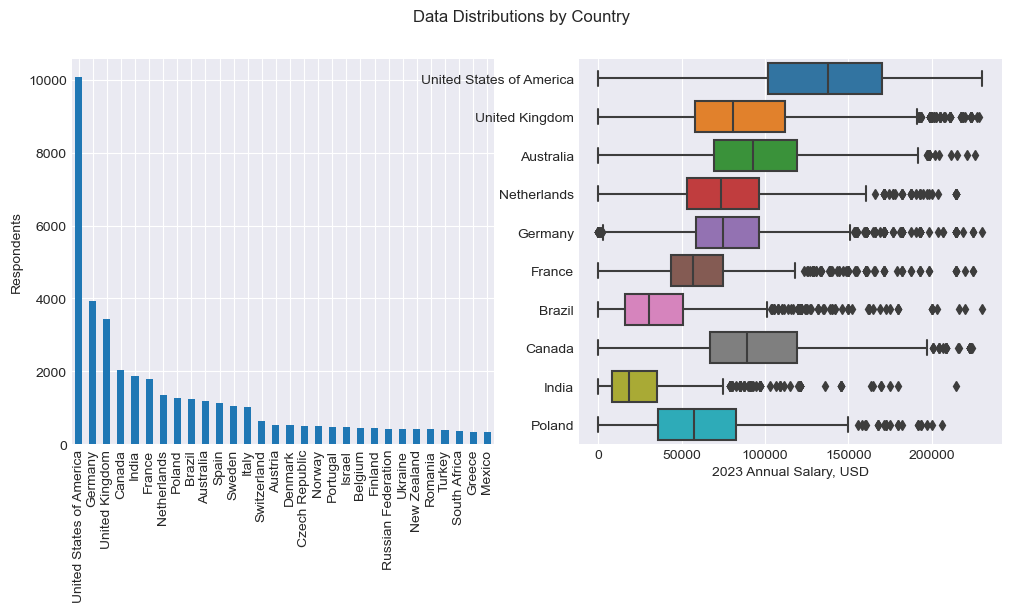

In [13]:
# number of respondents by a country

fig = plt.figure(figsize=(width, height))
fig.tight_layout()
fig.suptitle("Data Distributions by Country")

ax1 = fig.add_subplot(121)
cdf.Country.value_counts().iloc[:30].plot.bar(ylabel="Respondents", ax=ax1)

ax2 = fig.add_subplot(122)
top10 = cdf.Country.value_counts().iloc[:10].index
fltr_countries = cdf.Country.apply(lambda x: x in top10)

sns.boxplot(data=cdf[fltr_countries], x="ConvertedCompYearly", y="Country", ax=ax2)
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD")

plt.show()
plt.close()

## Respondents by employment

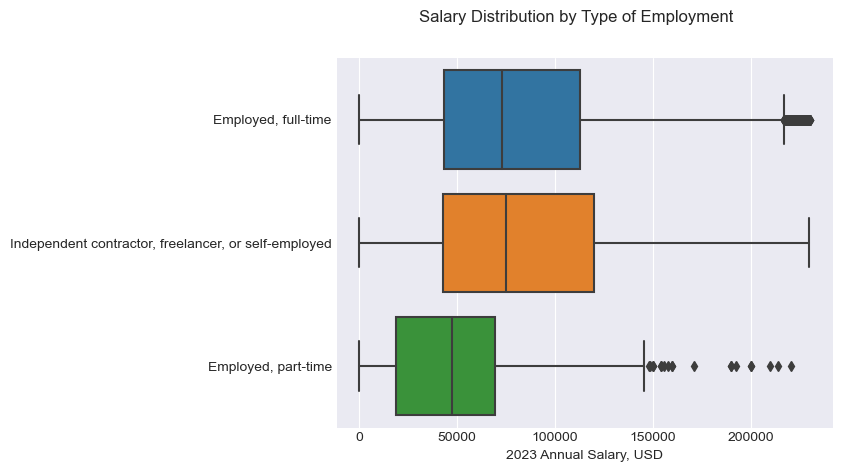

In [14]:
fig = plt.figure()
fig.suptitle("Salary Distribution by Type of Employment")
fig.tight_layout()
sns.boxplot(data=cdf, x="ConvertedCompYearly", y="Employment")
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD")
plt.show()
plt.close()

In [15]:
cdf.Employment.value_counts()

Employed, full-time                                     37390
Independent contractor, freelancer, or self-employed     3685
Employed, part-time                                       897
Name: Employment, dtype: int64

## Respondents by education

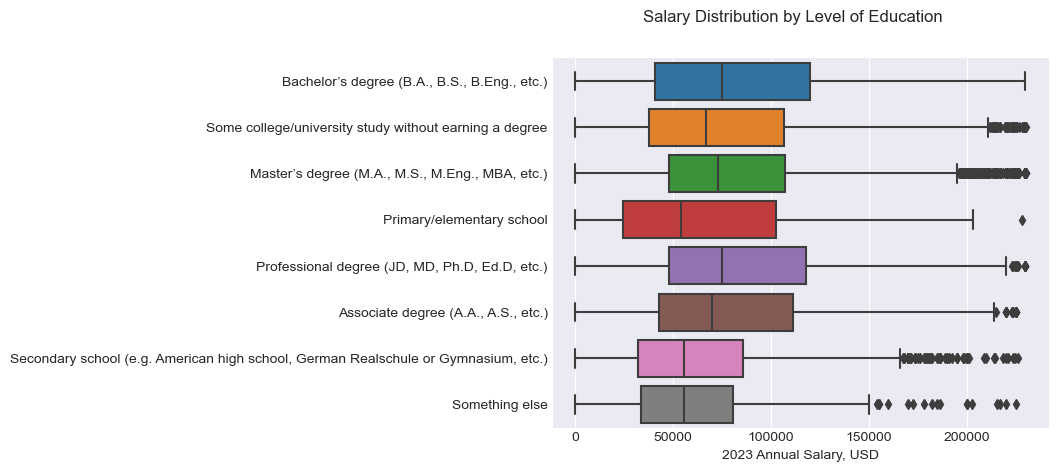

In [16]:
# respondents by education level

fig = plt.figure()
fig.suptitle("Salary Distribution by Level of Education")

sns.boxplot(data=cdf, x="ConvertedCompYearly", y="EdLevel")
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD")

plt.show()
plt.close()

In [17]:
# number of respondents by education levele
cdf.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21341
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12439
Some college/university study without earning a degree                                 5416
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2123
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2117
Associate degree (A.A., A.S., etc.)                                                    1550
Something else                                                                          486
Primary/elementary school                                                               210
Name: EdLevel, dtype: int64

## Respondents by job position

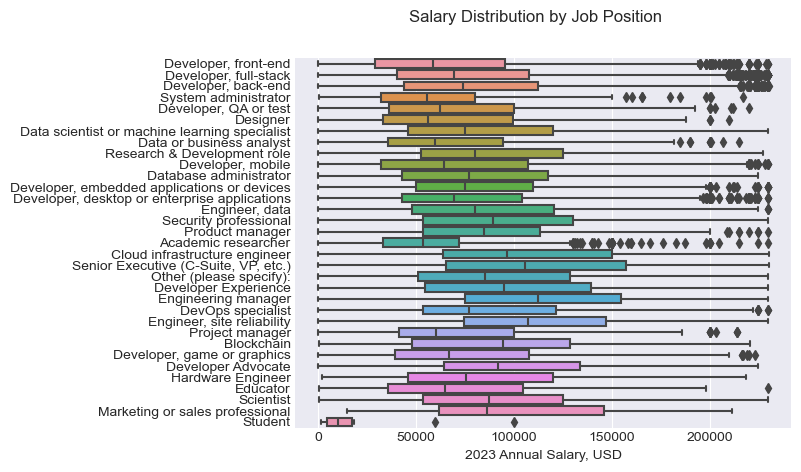

In [18]:
fig = plt.figure()
fig.suptitle("Salary Distribution by Job Position")

sns.boxplot(data=cdf, x="ConvertedCompYearly", y="DevType")
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD")

plt.show()
plt.close()

In [19]:
cdf.DevType.value_counts(dropna=False)

Developer, full-stack                            16529
Developer, back-end                               9054
Developer, front-end                              3195
Developer, desktop or enterprise applications     2353
Developer, mobile                                 1578
Other (please specify):                           1370
Developer, embedded applications or devices       1208
Engineering manager                               1155
DevOps specialist                                  940
Data scientist or machine learning specialist      921
Engineer, data                                     862
Research & Development role                        769
Cloud infrastructure engineer                      695
Senior Executive (C-Suite, VP, etc.)               634
Academic researcher                                609
Developer, game or graphics                        460
Data or business analyst                           442
Developer, QA or test                              349
System adm

## Issues with data

* High-dimensional data. The multidimensionality of the data is determined by the number of categorical variables and the level of their categories

* High cardinality features (variables with too many labels) tend to dominate over those with only a few labels, particularly in tree based algorithms. A big number of labels within a variable may introduce noise with little if any information, therefore making the machine learning models prone to over-fit. Some of the labels may only be present in the training data set, but not in the test set, therefore causing algorithms to over-fit the training set. Contrarily, new labels may appear in the test set that were not present in the training set, therefore leaving algorithm unable to perform a calculation over the new observation

* Co-linearity among numerical variables

* Bias in the data based on a number of available records per country

* 2023 annual income has a number of outliers



**All mentioned above indicates that using linear regression or regression tree to predict the annual income is not the best model choice**